# Autogyro head angle

Notebook sloužící pro výpčet polohy serv pro požadovaný náklon rotorové hlavy vírníku

In [15]:
import math
from sympy import *
from sympy.plotting import *
from sympy.physics.vector import *
init_printing(use_unicode=True)

from mpl_toolkits import mplot3d
%matplotlib nbagg
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# prvni cast: Požadovaná poloha kulových čepů na desce hlavy 

Nasledujici blok vytvari matici rotace. Rx a Ry jsou rotace podle jedné osy, R je už složené

r_x a r_y jsou uhly rotace okolo osy
plate_x, plate_y je poloha kloubku.

Matice rotace


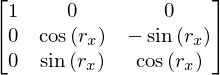

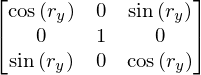

'Tato rotace je pro nalezeni polohy kulového čepu desky'

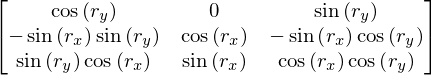

Vektory ke kulovým čepům na desce


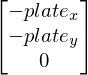

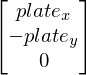

In [16]:
r_x, r_y = symbols('r_x r_y')

plate_x, plate_y = symbols('plate_x plate_y')
v_plate_x, v_plate_y = 44, 45

# Matice rotace
Rx = Matrix([
      [1, 0, 0],
      [0, cos(r_x), -sin(r_x)],
      [0, sin(r_x), cos(r_x)]
    ])
Ry = Matrix([
      [cos(r_y), 0, sin(r_y)],
      [0, 1, 0],
      [sin(r_y), 0, cos(r_y)]
    ])
R = Rx*Ry

# vektory od stredu rotoru ke kazdemu kloubku
b1 = Matrix([-plate_x, -plate_y, 0])
b2 = Matrix([ plate_x, -plate_y, 0])

print("Matice rotace")
display(Rx, Ry, "Tato rotace je pro nalezeni polohy kulového čepu desky", R)
print("Vektory ke kulovým čepům na desce")
display(b1, b2)

Souradnice kazdeho kloubku jsou

'Toto jsou vektory, do kterých stačí jen nahradit rotaci.'

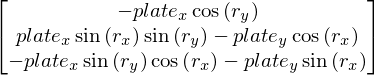

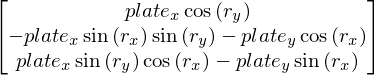

In [17]:
plate_joint1 = (R*b1)
plate_joint2 = (R*b2)
display("Toto jsou vektory, do kterých stačí jen nahradit rotaci.", plate_joint1, plate_joint2)

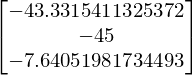

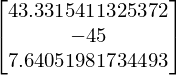

In [18]:
rxd = 0  # dopredu dozadu
ryd = 10 # leva prava
v_plate_joint1 = plate_joint1.subs([
        (r_x, math.radians(rxd)),
        (r_y, math.radians(ryd)),
        (plate_x, v_plate_x),
        (plate_y, v_plate_y)
    ])
v_plate_joint2 = plate_joint2.subs([
        (r_x, math.radians(rxd)),
        (r_y, math.radians(ryd)),
        (plate_x, v_plate_x),
        (plate_y, v_plate_y)
    ])
display(v_plate_joint1, v_plate_joint2)

<IPython.core.display.Javascript object>


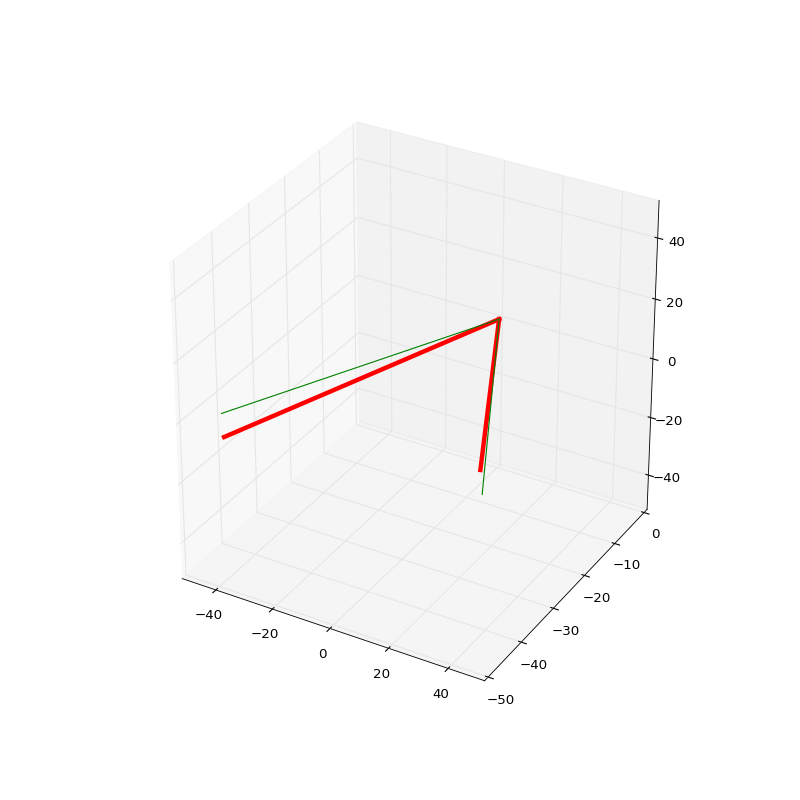

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim3d(-50,50)
ax.set_ylim3d(-50,0)
ax.set_zlim3d(-50,50)

ax.plot3D([0, v_plate_joint1[0]], [0, v_plate_joint1[1]], [0, v_plate_joint1[2]], color='red', lw=4)
ax.plot3D([0, v_plate_joint2[0]], [0, v_plate_joint2[1]], [0, v_plate_joint2[2]], color='red', lw=4)

zv_plate_joint1 = plate_joint1.subs([(r_x, math.radians(0)),(r_y, math.radians(0)), (plate_x, v_plate_x),(plate_y, v_plate_y)])
zv_plate_joint2 = plate_joint2.subs([(r_x, math.radians(0)),(r_y, math.radians(0)), (plate_x, v_plate_x),(plate_y, v_plate_y)])
ax.plot3D([0, zv_plate_joint1[0]], [0, zv_plate_joint1[1]], [0, zv_plate_joint1[2]], color='green')
ax.plot3D([0, zv_plate_joint2[0]], [0, zv_plate_joint2[1]], [0, zv_plate_joint2[2]], color='green')

souradnice kloubku 1 jsou


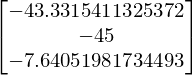

souradnice kloubku 2 jsou


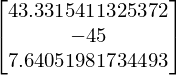

In [20]:
print("souradnice kloubku 1 jsou")
display(v_plate_joint1)
print("souradnice kloubku 2 jsou")
display(v_plate_joint2)

# cast druha: Poloha serva

In [21]:
su = [
    ('r_x', math.radians(0)), ('r_y', math.radians(5)), # pozadovane natoceni desky
    ('plate_x', 44), ('plate_y', 45), # rozmery horni desky
    
    ('n_s1_x', -1),('n_s1_y', 0),('n_s1_z', 0),
    ('s1_x', -50),('s1_y', -45),('s1_z', -50),
    ('rod_l1', 52.22), # delka tycky..
    
    ('n_s2_x',  1),('n_s2_y', 0),('n_s2_z', 0),
    ('s2_x', 50),('s2_y', -45),('s2_z', -50),
    ('rod_l2', 52.22),
    
    ('lever_r', 15)
    ]

su2 = su.copy()
su2.pop(0)
su2.pop(0)
print(su2)

[('plate_x', 44), ('plate_y', 45), ('n_s1_x', -1), ('n_s1_y', 0), ('n_s1_z', 0), ('s1_x', -50), ('s1_y', -45), ('s1_z', -50), ('rod_l1', 52.22), ('n_s2_x', 1), ('n_s2_y', 0), ('n_s2_z', 0), ('s2_x', 50), ('s2_y', -45), ('s2_z', -50), ('rod_l2', 52.22), ('lever_r', 15)]


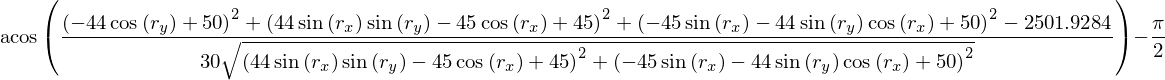

'uhel serva:'

In [22]:
rod_l1 = symbols('rod_l1') # delky tahel
lever_r = symbols('lever_r') # velikost paky na servu

#plate_joint1 - pozice kloubku
#rod_l1 - delka tahla
pos_s1 = Matrix(symbols('s1_x s1_y s1_z')) # pozice osy serva
n_s1 = Matrix(symbols('n_s1_x n_s1_y n_s1_z')) # vektor osy serva, je potreba, aby byl jejdnotkovy

v_rod_l1 = 50
v_pos_s1 = Matrix([-50, -45, -50])

d = n_s1.dot(pos_s1-plate_joint1) # vzdalenost roviny serva od kloubku
project_joint = plate_joint1 + d*n_s1 # pozice stredu kruznice pruseciku roviny serva a sfery
project_rod_l1= sqrt(rod_l1**2-d**2)
#pr = sqrt(rod_l1**2 - d**2) # polomer kruznice pruseciku
#t = (pc-pos_s1).cross(n_s1)

# vzdalenost stredu projekce a stredu serva
ds = sqrt((project_joint[0]-pos_s1[0])**2+(project_joint[1]-pos_s1[1])**2+(project_joint[2]-pos_s1[2])**2)

angle = acos((ds**2 + lever_r**2 - project_rod_l1**2)/(2*ds*lever_r))-pi/2

display(angle.subs(su2))
display("uhel serva:", math.degrees(angle.subs(su)))


<IPython.core.display.Javascript object>


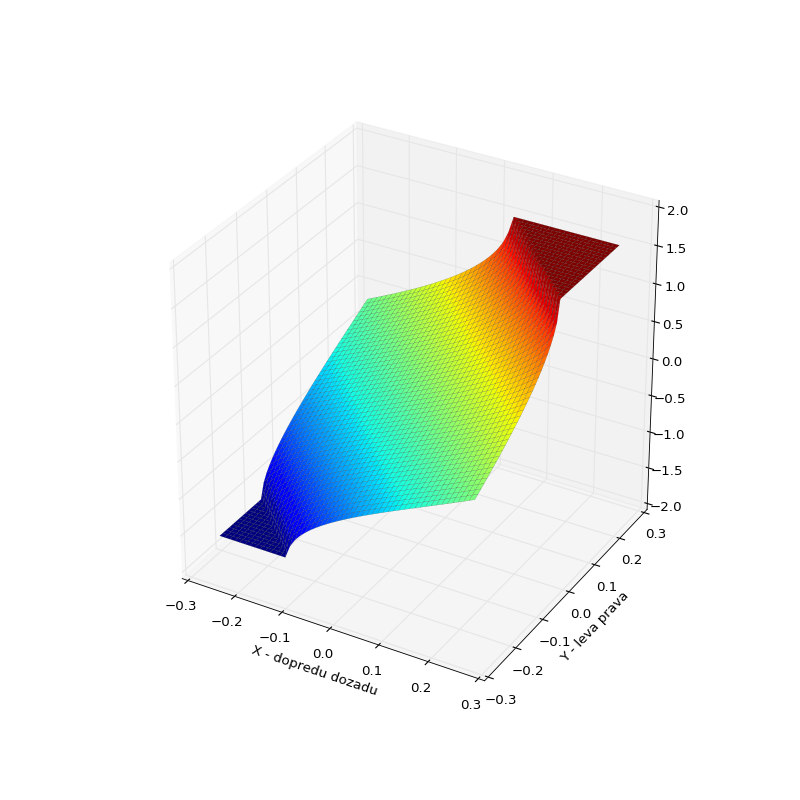

In [23]:
plt.rcParams['figure.figsize'] = 10, 10
plot3d(angle.subs(su2), ('r_x', math.radians(-15), math.radians(15)), ('r_y', math.radians(-15), math.radians(15)), xlabel="X - dopredu dozadu", ylabel = "Y - leva prava", figsize=(15,15))


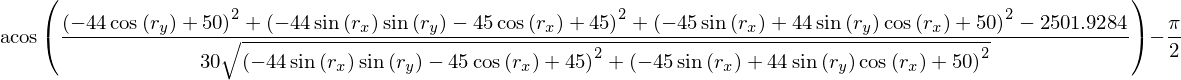

'uhel serva:'

In [24]:
rod_l2 = symbols('rod_l2') # delky tahel
lever_r = symbols('lever_r') # velikost paky na servu

#plate_joint2 - pozice kloubku
#rod_l2 - delka tahla
pos_s2 = Matrix(symbols('s2_x s2_y s2_z')) # pozice osy serva
n_s2 = Matrix(symbols('n_s2_x n_s2_y n_s2_z')) # vektor osy serva, je potreba, aby byl jejdnotkovy

d = n_s2.dot(pos_s2-plate_joint2) # vzdalenost roviny serva od kloubku
project_joint = plate_joint2 + d*n_s2 # pozice stredu kruznice pruseciku roviny serva a sfery
project_rod_l2= sqrt(rod_l2**2-d**2)

# vzdalenost stredu projekce a stredu serva
ds = sqrt((project_joint[0]-pos_s2[0])**2+(project_joint[1]-pos_s2[1])**2+(project_joint[2]-pos_s2[2])**2)
angle = acos((ds**2 + lever_r**2 - project_rod_l2**2)/(2*ds*lever_r))-pi/2

display(angle.subs(su2))
display("uhel serva:", math.degrees(angle.subs(su)))

<IPython.core.display.Javascript object>


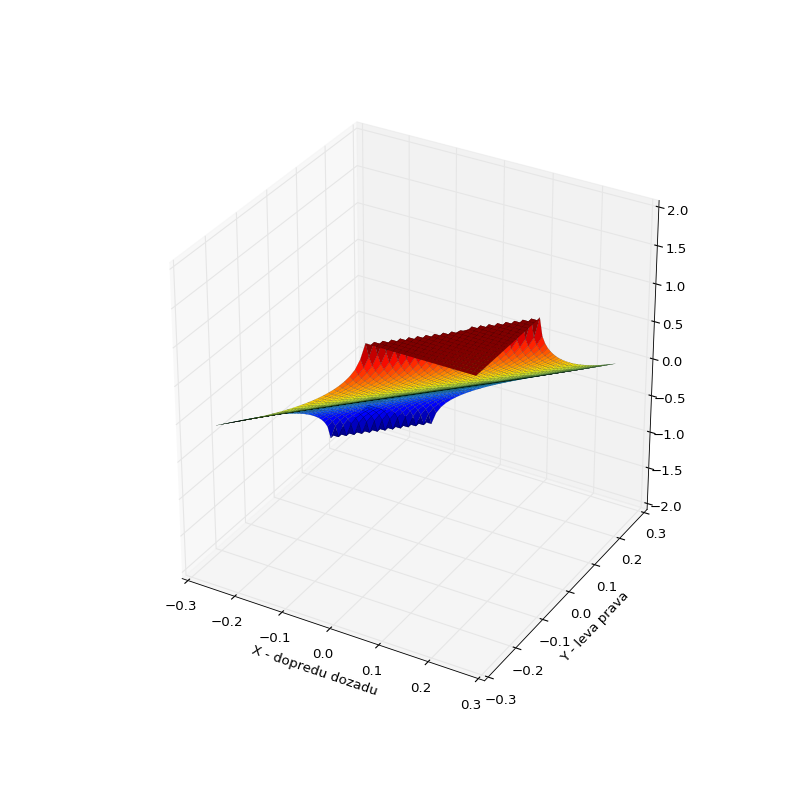

In [28]:
plot3d(angle.subs(su2), ('r_x', math.radians(-15), math.radians(15)), ('r_y', math.radians(-15), math.radians(15)), xlabel="X - dopredu dozadu", ylabel = "Y - leva prava", figsize=(15,15))

# Proložení nelineární plochy rovinou

<IPython.core.display.Javascript object>


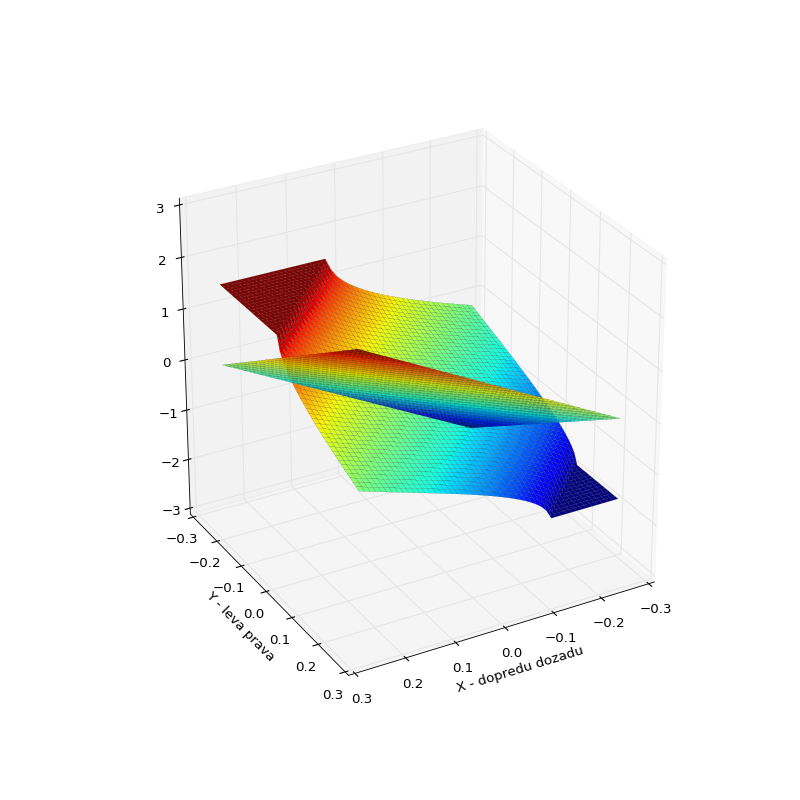

In [29]:
plt.rcParams['figure.figsize'] = 10, 10
plane = r_x*5 + r_y*5
plot3d(angle.subs(su2), plane, ('r_x', math.radians(-15), math.radians(15)), ('r_y', math.radians(-15), math.radians(15)), xlabel="X - dopredu dozadu", ylabel = "Y - leva prava", figsize=(15,15))

<IPython.core.display.Javascript object>


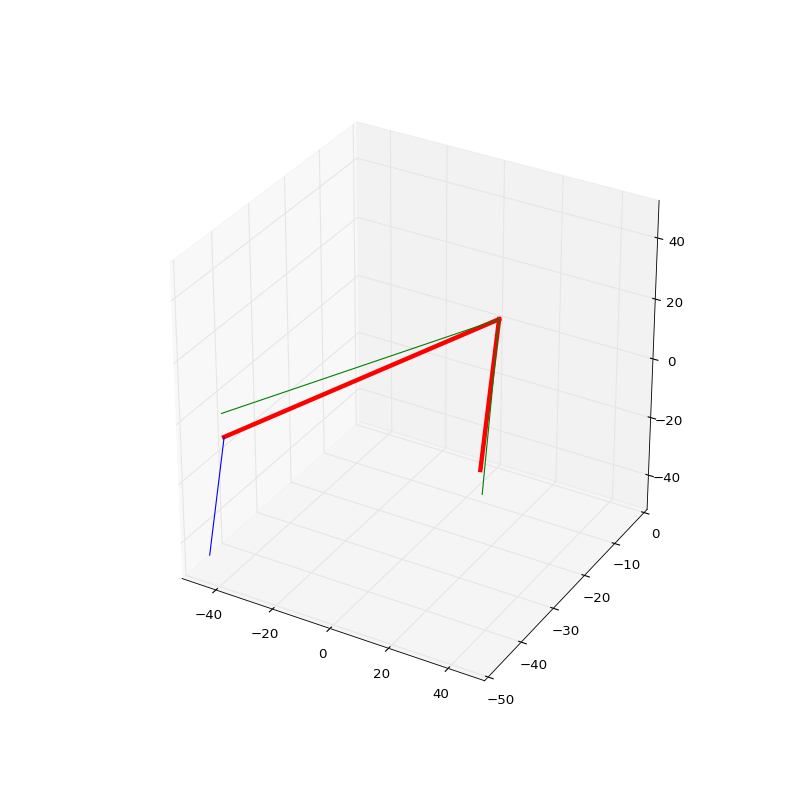

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlim3d(-50,50)
ax.set_ylim3d(-50,0)
ax.set_zlim3d(-50,50)

ax.plot3D([0, v_plate_joint1[0]], [0, v_plate_joint1[1]], [0, v_plate_joint1[2]], color='red', lw=4)
ax.plot3D([0, v_plate_joint2[0]], [0, v_plate_joint2[1]], [0, v_plate_joint2[2]], color='red', lw=4)

ax.plot3D([v_pos_s1[0], v_plate_joint1[0]], [v_pos_s1[1], v_plate_joint1[1]], [v_pos_s1[2], v_plate_joint1[2]], color='blue', lw=1)
#ax.plot3D([projekce[0], v_plate_joint1[0]], [projekce[1], v_plate_joint1[1]], [projekce[2], v_plate_joint1[2]], color='blue', lw=1)
#ax.plot3D([0, v_plate_joint2[0]], [0, v_plate_joint2[1]], [0, v_plate_joint2[2]], color='blue', lw=4)

zv_plate_joint1 = plate_joint1.subs([(r_x, math.radians(0)),(r_y, math.radians(0)), (plate_x, v_plate_x),(plate_y, v_plate_y)])
zv_plate_joint2 = plate_joint2.subs([(r_x, math.radians(0)),(r_y, math.radians(0)), (plate_x, v_plate_x),(plate_y, v_plate_y)])
ax.plot3D([0, zv_plate_joint1[0]], [0, zv_plate_joint1[1]], [0, zv_plate_joint1[2]], color='green')
ax.plot3D([0, zv_plate_joint2[0]], [0, zv_plate_joint2[1]], [0, zv_plate_joint2[2]], color='green')